In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

from pandas import read_html


# How does the growth rate of the invasive tribble fish in Lake Evolution, an isolated lake, affect the population of the native cute fish over time?

Lake Evolution has held a steady population of cute fish in equilibrium for as long as anyone can remember. However, with the recent spread of the invasive, quick reproducing tribble fish, many locals are worried about how their introduction to Lake Evolution might affect the native population. Tribble fish have been shown to have a widely varying growth rate based on many factors. So, how would their growth rate affect the cute fish population if they were to be introduced to Evolution Lake? 

To explore this we will create a model of the tribble fish’s population growth based on the set growth rate. Next, we will calculate the tribble fish’s consumption of Lake Evolution’s resources. Finally, we will model the cute fish’s population based on the resources left available to them.

We will run the model a series of times with varying tribble growth rates to show how the cute population might be affected based on how quickly the tribble reproduce.



In [2]:
system = System(cute_cap = 1375, tribble_cap = 11000, cute_birth_rate = 0.05, tribble_initial_pop=2)
lake_sim = State(AR = 100, cute_death_rate=0.05, tribble_annual_growth = 0.01)

,values
AR,100.00
cute_death_rate,0.05
tribble_annual_growth,0.01


Above are the variables and objects we established to set up Evolution Lake. 

#### System variable explanations:
```
Cute_cap represents the carrying capacity for just the cute fish based on the ratio of body mass to volume of water
Tribble_cap represents the carrying capacity for just the tribble fish based on the ratio of body mass to volume of water
Tribble_initial_pop represents the tribble's population, it starts at 2 because that's what's needed for a population to start
```

#### State object explanations:
```

AR represents the amount of resources available to the cute fish in the lake. This number is in percentage (it doesn't 
mean there are 100 pieces of food in the lake)
```

## **The numbers for cute fish and tribble fish are based on salmon and sunfish statistics, respectively*


In [3]:
def run_simulation(lake_sim, tribble_growth_rate, system, number): #the tribble growth rate changes based on what is passed
    tribble_results = TimeSeries() #establishes the series to hold each year's tribble population
    tribble_results[0] = system.tribble_initial_pop #the start of the tribble population
    
    AR_results = TimeSeries() #establishes the series to keep track of each year's available resources for the cute fish
    
    cute_results = TimeSeries() #establishes the series to keep track of the cute fish's population throughout the iterations
    cute_results[0] = system.cute_cap #the start of the cute fish's population just before the tribbles invade the lake
    
    for t in range(300): #300 represents the 300 years this will simulate/predict
        lake_sim.tribble_annual_growth = tribble_results[t]*tribble_growth_rate* (1- (tribble_results[t]/system.tribble_cap)) 
                #this formula calculates the annual growth of the tribble fish using the passed rate
        tribble_results[t+1] = tribble_results[t] + lake_sim.tribble_annual_growth
                #this adds the annual growth the the previous year's population
        
        AR_results[t] = (1- (tribble_results[t]/system.tribble_cap)*0.125)*100 #available resources in the lake for cute fish
        
        lake_sim.cute_death_rate =  0.05 + (1- AR_results[t]/100)* 0.95 
        #this formula calculates the death rate of the cute fish based off of the available resources
        cute_results[t+1] = cute_results[t] + ((system.cute_birth_rate*cute_results[t]) - (lake_sim.cute_death_rate*cute_results[t]))
        #this adds the annual growth (the last two-thirds of the equation) to the previous year's population
        
    if number == 2:
        plot_both_pops(tribble_results, cute_results) #this is here to give the option of printing out a single run through
    else:
        return cute_results

In [4]:
def plot_both_pops(tribble_results, cute_results): #plots both populations for comparison with a set tribble gorwht rate
    plot(cute_results, label = 'Cute Population')
    plot(tribble_results, label='Tribble Population')
    decorate(xlabel = 'Years',
             ylabel = 'Pop (in millions)',
             title = 'Cute Fish and Trible Fish Population vs Time')
    legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.show()

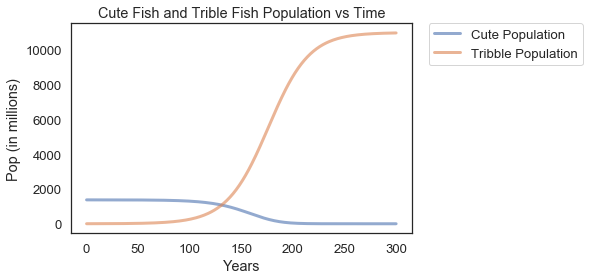

In [5]:
run_simulation(lake_sim, 0.05, system, 2) #runs the simulation once with tribble growth rate at 0.05 

### Snapshot of the Simulation, showing the populations' relationship

The above graph shows the result of run_simulation with a plot of both fish populations. You can see how the increase of the tribble fish caused a rapid decline in the cute fish's population. Notice how the cute fish go extinct before the tribble fish reach their carrying capacity. This shows how the diminished resources affect the cute fish fatally even before they are completely depleted.

The graph shows how once the cute fish population begins to crash even the minority still recieving available resources can't survive very long. At a crucial point the native population will not be able to sustain itself and begins a quick decline.

In [6]:
def growth_rate_sweep():
    growth_array = linspace(0.01,0.1,10) #this creates the array of tribble growth rates 
    for t in growth_array: #the model runs 10 times with each varying growth rate
        plot(run_simulation(lake_sim, t, system,0), label = "%0.2f"%t) #the cute fish population is plotted for each growth rate 
    
    decorate(xlabel = 'Years',
             ylabel = 'Pop (in millions)',
             title = 'Cute Fish Population vs Time')
    legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.show()

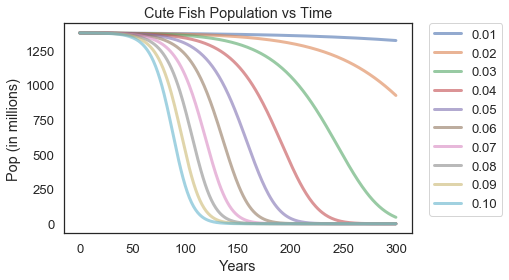

In [7]:
growth_rate_sweep()

# Interpretation:
This figure shows the cute fish's population based on the tribble fish's varying growth rates. The growth rate is the initial annual percentage growth of the tribble fish population. As the population increases the growth rate declines correspondingly to represent the carrying capacity of the pond, making the population curve quadratic. The dependent cute fish population thus takes a similar shape.

As can be seen in the final figure, the cute fish's population declines ever sooner as the tribble's growth rate increases. We were surprised to see a geometric relationship between the timing of the different population curves decline because the tribble fish growth rate changes at a constant linear rate. As the growth rate decreases the cute fish population crash happens at what appears to be exponentially later times.

The rate at which the cute fish go extinct is also correspondingly lower based on the diminished tribble growth rate as expected. We didn't, however, expect the tribble fish population to take so long to start, making large scale impact on the cute fish. Even in the most invasive situation, the cute fish's population doesn't strongly decline until after year 50.

We failed to consider a couple of aspects in our model. Firstly, we did not account for the cute fish's ability to adapt to the diminished resources and competition. An improved model could account for this. Secondly, we assumed that the tribble fish had no predators and that the cute fish's predators would not adapt their diet as their normal food supply was depleted. Furthermore, we ignored other changes that might occur due to the introduction of a new species in a closed ecosystem. There are innumerable factors that may affect either population unpredictably and lead to massive trophic cascade.

The model did inform us that given enough time, the tribble fish will completely wipe out the cute fish. However, lower tribble growth rates mean the cute fish population survives exponentially longer. This is very important, as it shows the most effective way to handle an invasive species. 

As soon as tribble fish are introduced to Evolution Lake, they start to spread, but their population doesn't spike for five decades at least. During that time the population of invasive species can be suppressed or even fished to extinction. This lowers their growth rate giving the native species a longer time to adapt survival strategies. Once the invasive population reaches a certain size though, the native species will be set on a quick path to extinction.